In [ ]:
!pip install numpy matplotlib seaborn tensorflow scikit-learn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 3188 images belonging to 2 classes.
Found 798 images belonging to 2 classes.
Epoch 1/50
200/200 [==============================] - 9s 41ms/step - loss: 0.5720 - accuracy: 0.7607 - val_loss: 0.5489 - val_accuracy: 0.7632
Epoch 2/50
200/200 [==============================] - 4s 19ms/step - loss: 0.5604 - accuracy: 0.7638 - val_loss: 0.5554 - val_accuracy: 0.7632
Epoch 3/50
200/200 [==============================] - 4s 17ms/step - loss: 0.5336 - accuracy: 0.7638 - val_loss: 0.5393 - val_accuracy: 0.7632
Epoch 4/50
200/200 [==============================] - 3s 17ms/step - loss: 0.5570 - accuracy: 0.7638 - val_loss: 0.5464 - val_accuracy: 0.7632
Epoch 5/50
200/200 [==============================] - 4s 20ms/step - loss: 0.5150 - accuracy: 0.7638 - val_loss: 0.5754 - val_accuracy: 0.7632
Epoch 6/50
200/200 [==============================] - 4s 17ms/step - loss: 0.4593 - accuracy: 0.7666 - val_loss: 0.4524 - val_accuracy: 0.7632
Epoch 7/50
200/200 [==============================] - 4s 20

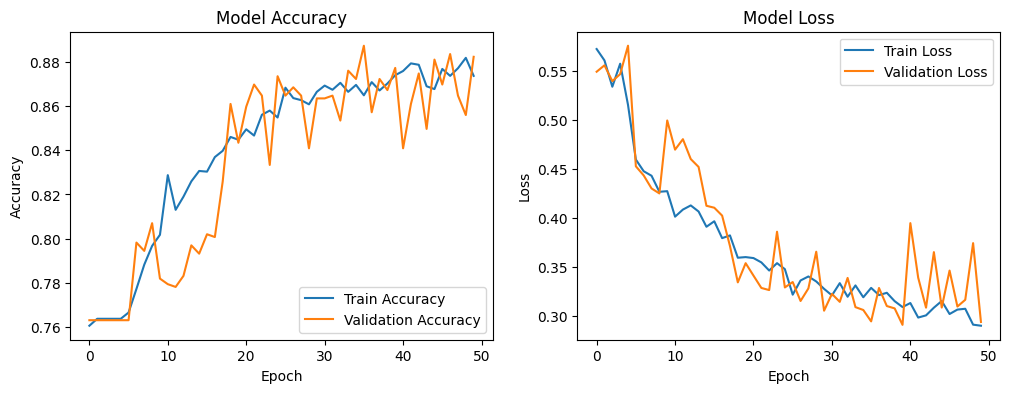

50/50 [==============================] - 1s 9ms/step
Classification Report
              precision    recall  f1-score   support

      galaxy       0.24      0.21      0.22       189
        star       0.76      0.79      0.78       609

    accuracy                           0.65       798
   macro avg       0.50      0.50      0.50       798
weighted avg       0.64      0.65      0.65       798

Confusion Matrix


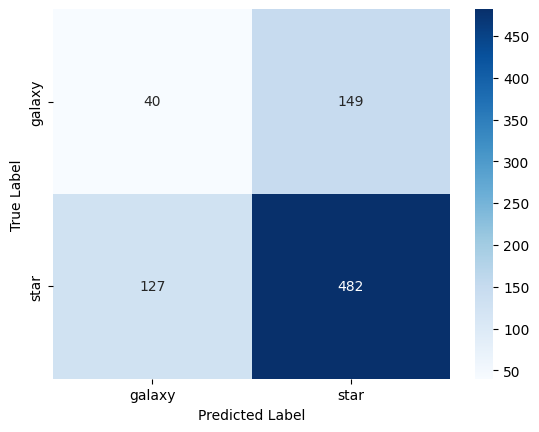

In [ ]:
!pip install numpy matplotlib seaborn tensorflow scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
# Set up directories
train_dir = '/content/drive/MyDrive/mini-project/data/train'
test_dir = '/content/drive/MyDrive/mini-project/data/test'


# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64, 64),
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(64, 64),
                                                  batch_size=16,
                                                  class_mode='categorical',
                                                  color_mode='grayscale')

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator)

# Evaluate the model
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate classification report and confusion matrix
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model.save('/home/user/ajay das/mini-project/model/mymodel.h5')

In [4]:
from tensorflow.keras.models import load_model  # Import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model (replace 'path_to_saved_model' with your model's path)
model = load_model('/content/drive/MyDrive/mini-project/model/star_galaxy_classification_model.h5')

def predict_image(img_path, model, target_size=(64, 64)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Rescale the image (same scaling as used during training)
    img_array = img_array / 255.0

    # Expand dimensions to match the model's input shape (1, 64, 64, 1)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)

    # Get the class index
    predicted_class_index = np.argmax(prediction, axis=1)[0]

    # Map the class index to the corresponding class name
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[predicted_class_index]

    # Output the result
    print(f"Predicted class: {predicted_class}")

# Example usage
img_path = '/content/drive/MyDrive/mini-project/data/test/star/IC3521-H01_1419_1705_6.jpg'  # Corrected path to your input image
predict_image(img_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


NameError: name 'train_generator' is not defined